In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\Big Mart Predicition\train.csv")

test=pd.read_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\Big Mart Predicition\test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# List of unique products
len(train['Item_Identifier'].unique())

1559

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
train.replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace = True)
test.replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'},inplace = True)

In [10]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [11]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train_data = pd.DataFrame()
for item in list(set(train['Item_Identifier'])):
  temp = train.loc[train['Item_Identifier']==item].copy()

  temp['Item_Weight'].fillna(temp['Item_Weight'].mean(),inplace = True)
  train_data = train_data.append(temp)
print(train_data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1351           FDM32       20.500          Low Fat         0.000000   
4476           FDM32       20.500          Low Fat         0.020588   
7037           FDM32       20.500          Low Fat         0.020605   
7822           FDM32       20.500          Low Fat         0.020689   
1108           FDT38       18.700          Low Fat         0.057654   
2688           FDT38       18.700          Low Fat         0.057627   
3984           FDT38       18.700          Low Fat         0.057772   
273            FDK51       19.850          Low Fat         0.005234   
3416           FDK51       19.850          Low Fat         0.005243   
4144           FDK51       19.850          Low Fat         0.005231   
4159           FDK51       19.850          Low Fat         0.008763   
4195           FDK51       19.850          Low Fat         0.005235   
5859           FDK51       19.850          Low Fat         0.005210   
7788  

In [13]:

test_data = pd.DataFrame()
for item in list(set(test['Item_Identifier'])):
  temp = test.loc[test['Item_Identifier']==item].copy()

  temp['Item_Weight'].fillna(temp['Item_Weight'].mean(),inplace = True)
  test_data = test_data.append(temp)
print(test_data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
304            FDM32       20.500          Low Fat         0.020601   
466            FDM32       20.500          Low Fat         0.020722   
999            FDM32       20.500          Low Fat         0.020647   
1054           FDM32       20.500          Low Fat         0.020637   
3216           FDM32       20.500          Low Fat         0.020505   
952            FDT38       18.700          Low Fat         0.057863   
1380           FDT38       18.700          Low Fat         0.057490   
3089           FDT38       18.700          Low Fat         0.057537   
3139           FDT38       18.700          Low Fat         0.057527   
4821           FDT38       18.700          Low Fat         0.057259   
1360           FDK51       19.850          Low Fat         0.005256   
1396           FDK51       19.850          Low Fat         0.000000   
1208           FDU33        7.630          Regular         0.134983   
1542  

In [14]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
products = list(train_data[train_data['Item_Weight'].isnull()]['Item_Identifier'])
products

['FDQ60', 'FDK57', 'FDE52', 'FDN52']

In [16]:
test_products = list(test_data[test_data['Item_Weight'].isnull()]['Item_Identifier'])
len(test_products)

20

In [17]:
product_price_test=[]
for item in test_products:
    product_price_test.append(train[train['Item_Identifier']==item].iloc[0]['Item_Weight'])
dictionary=dict(zip(test_products,product_price_test))   

In [18]:
product_price = []
for item in products:
  product_price.append(test[test['Item_Identifier'] == item].iloc[0]['Item_Weight'])
dictionary = dict(zip(products, product_price))

In [19]:
dictionary

{'FDQ60': 6.195, 'FDK57': 10.195, 'FDE52': 10.395, 'FDN52': 9.395}

In [20]:
train_data.loc[train_data['Item_Weight'].isnull(),'Item_Weight'] = train_data['Item_Identifier'].map(dictionary)

In [21]:
test_data.loc[test_data['Item_Weight'].isnull(),'Item_Weight'] = test_data['Item_Identifier'].map(dictionary)

In [22]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
train_data['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

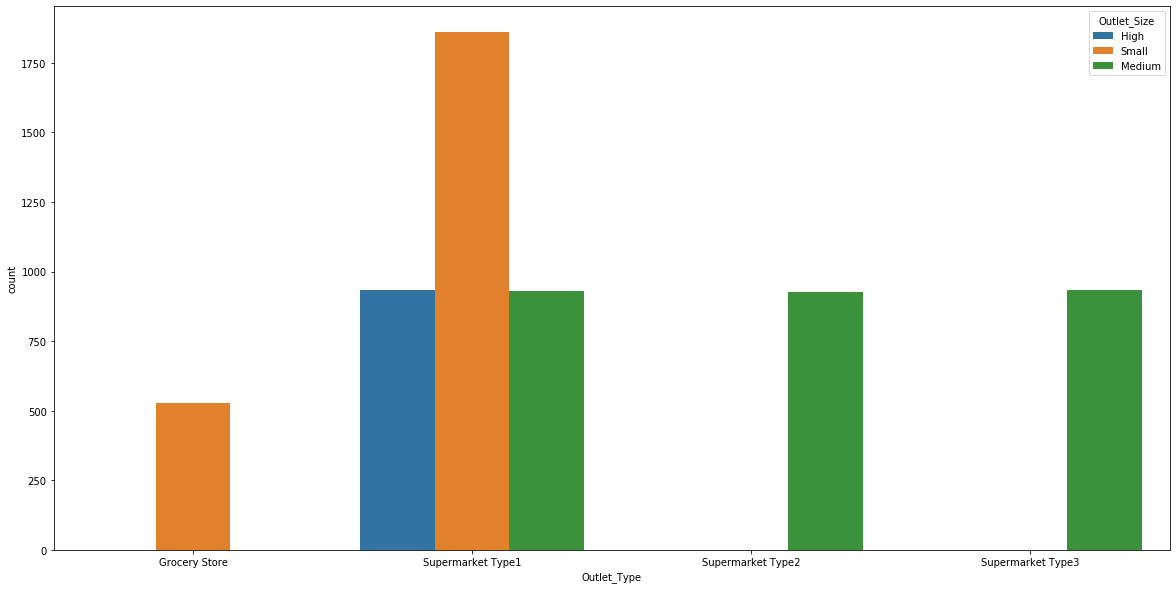

In [24]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(train_data['Outlet_Type'],hue=train_data["Outlet_Size"])

In [25]:
#Imputing the data
train_data.loc[train_data['Outlet_Type']=='Grocery Store', 'Outlet_Size'] = 'Small'
train_data.loc[train_data['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'] = train_data['Outlet_Size'].fillna('Small')
train_data.loc[train_data['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = train_data['Outlet_Size'].fillna('Medium')

In [26]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
train_data.to_csv('trainData.csv')

#### Data Preprocessing

In [28]:
train=pd.read_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\Big Mart Predicition\trainData.csv")

In [29]:
train[train['Item_Visibility']==0].shape

(526, 13)

In [30]:
train.isnull().sum()

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
train['Item_Identifier'].dtypes

dtype('O')

In [32]:

train_data = pd.DataFrame()
for item in list(set(train['Item_Identifier'])):
  temp = train.loc[train['Item_Identifier']==item].copy()
  temp['Item_Visibility'] = temp['Item_Visibility'].replace(to_replace = 0, value = temp['Item_Visibility'].mean())
  train_data = train_data.append(temp,ignore_index=False)
#print(train_data)

In [33]:
testData = pd.DataFrame()
for item in list(set(test['Item_Identifier'])):
  temp = test_data.loc[test_data['Item_Identifier']==item].copy()
  temp['Item_Visibility'] = temp['Item_Visibility'].replace(to_replace = 0, value = temp['Item_Visibility'].mean())
  testData = testData.append(temp,ignore_index=False)

In [34]:
train_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
DRE49     9
FDX04     9
FDX20     9
DRN47     9
FDP25     9
FDW49     9
NCI54     9
FDX31     9
NCJ30     9
FDD38     9
FDF56     9
FDU12     9
FDV60     9
FDG09     9
NCY18     9
NCL31     9
FDF52     9
FDV38     9
FDW26     9
NCQ06     9
NCF42     9
FDQ40     9
NCB18     9
FDT07     9
FDO19     9
NCX05     8
FDL20     8
FDR48     8
         ..
FDW58     2
DRC24     2
NCS41     2
FDW10     2
FDE38     2
FDZ50     2
NCC55     2
FDA48     2
FDF38     2
DRL59     2
FDU09     2
FDT33     2
NCM42     2
NCX53     2
FDB10     2
FDR03     2
FDG28     2
FDM16     2
FDD22     2
FDR57     2
FDP15     2
FDQ60     1
FDT35     1
FDO33     1
FDN52     1
DRF48     1
FDK57     1
FDE52     1
FDC23     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [35]:

train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train_data['Item_Type_Combined'] = train_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [36]:
#Get the first two characters of ID:
testData['Item_Type_Combined'] = testData['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
testData['Item_Type_Combined'] = testData['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
testData['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [37]:
train_data['Outlet_Age'] = 2013 - train_data['Outlet_Establishment_Year']
testData['Outlet_Age'] = 2013 - testData['Outlet_Establishment_Year']

In [38]:
categorical_columns = list(train_data.columns[train_data.dtypes == 'object'])
usefull = ['Item_Identifier','Outlet_Identifier']
for i in usefull:
    categorical_columns.remove(i)

In [39]:

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for column in categorical_columns:
    train_data[column]= label_encoder.fit_transform(train_data[column])

In [42]:
categorical_columns = list(testData.columns[testData.dtypes == 'object'])
usefull = ['Item_Identifier','Outlet_Identifier']
for i in usefull:
    categorical_columns.remove(i)
    
categorical_columns

['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']

In [50]:
from sklearn import preprocessing     
label_encoder = preprocessing.LabelEncoder() 
  
#for column in categorical_columns:
testData["Outlet_Type"]= label_encoder.fit_transform(testData["Outlet_Type"])

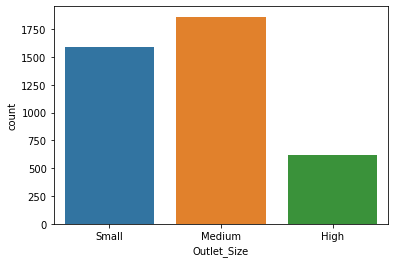

In [43]:
sns.countplot(testData['Outlet_Size'])

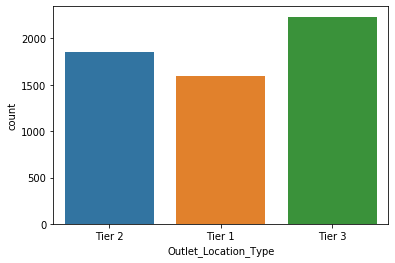

In [44]:
sns.countplot(testData['Outlet_Location_Type'])

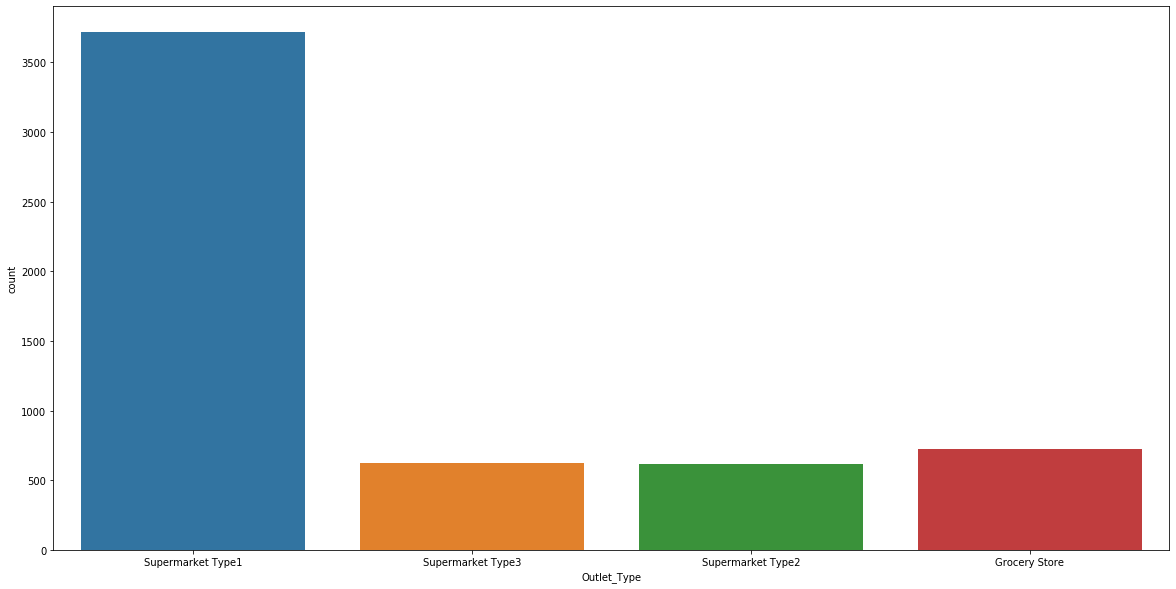

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(testData['Outlet_Type'])

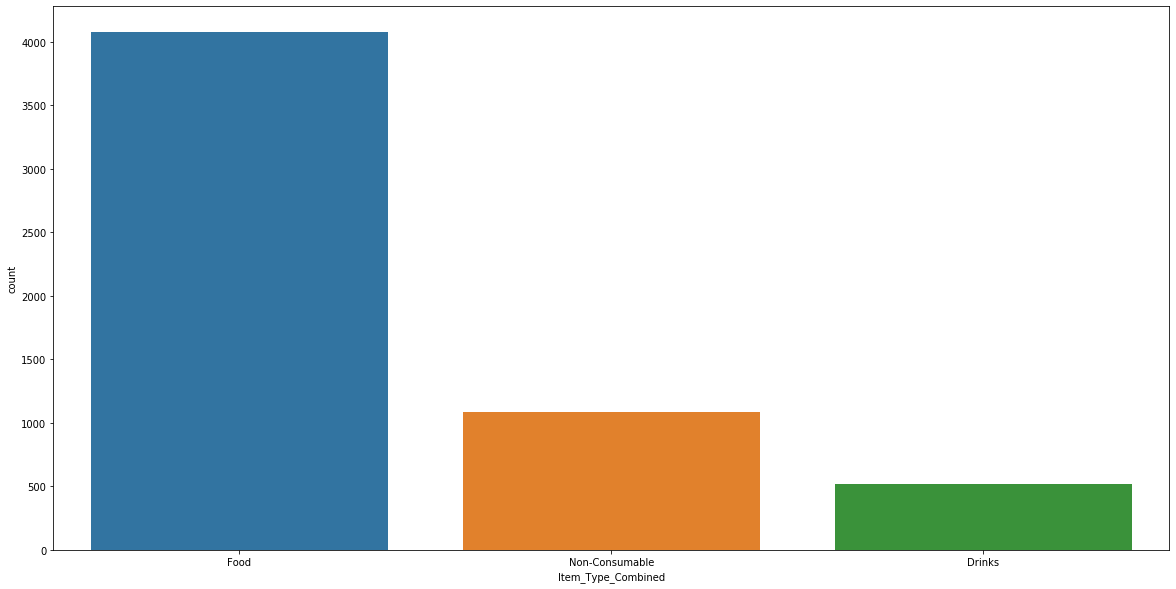

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(testData['Item_Type_Combined'])

In [52]:

testData['Outlet_Location_Type']= label_encoder.fit_transform(testData['Outlet_Location_Type'])


In [53]:
testData['Item_Type_Combined']= label_encoder.fit_transform(testData['Item_Type_Combined'])

In [54]:
testData["Outlet_Size"]= label_encoder.fit_transform(testData["Outlet_Size"])

TypeError: argument must be a string or number

In [55]:
testData["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [56]:
testData["Outlet_Size"].dtypes

dtype('O')

In [57]:
testData.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Type_Combined              0
Outlet_Age                      0
dtype: int64

In [58]:
test_data.loc[test_data['Outlet_Type']=='Grocery Store', 'Outlet_Size'] = 'Small'
test_data.loc[test_data['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'] = test_data['Outlet_Size'].fillna('Small')
test_data.loc[test_data['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = test_data['Outlet_Size'].fillna('Medium')

In [59]:
test_data.isnull().sum()

Item_Identifier               0
Item_Weight                  20
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
dtype: int64